<a href="https://colab.research.google.com/github/Cauet-Menezes/Inteligencia_Artificial/blob/main/PCV_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nomes: Cauet Corrêa de Menezes, Gustavo Carvalho Alves dos Santos

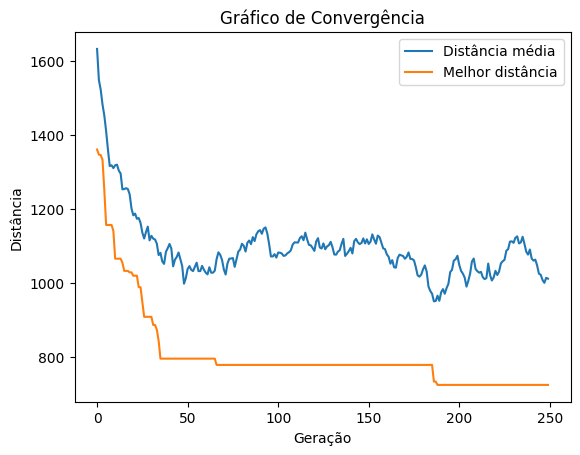

Melhor rota encontrada: ['Sydney', 'Guam', 'Tokyo', 'Manila', 'Shanghai', 'Bombay', 'Cairo', 'Baghdad', 'Rome', 'Paris', 'Istanbul', 'Berlin', 'Moscow', 'London', 'Azores', 'New York', 'Chicago', 'Mexico City', 'Panama City', 'Honolulu', 'Juneau', 'San Francisco', 'Seattle', 'Montreal', 'Rio de Janeiro', 'Buenos Aires', 'Capetown', 'Santiago', 'New Orleans', 'Melbourne']
Melhor distância encontrada: 725


In [7]:
import numpy as np
import random
import matplotlib.pyplot as plot

def carregar_cidades(nome_arquivo):
    cidades = []
    with open(nome_arquivo, 'r') as arquivo:
        for linha in arquivo:
            linha = linha.strip()
            if linha and not linha.startswith('#'):
                cidades.append(linha)
    return cidades

def carregar_distancias(nome_arquivo):
    matriz_distancias = []
    with open(nome_arquivo, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith('#'):
                row = list(map(int, line.strip().split()))
                matriz_distancias.append(row)
    return matriz_distancias

def calcular_distancia_total(rota, matriz_distancias):
    distancia = 0
    for i in range(len(rota) - 1):
        distancia += matriz_distancias[rota[i]][rota[i+1]]
    distancia += matriz_distancias[rota[-1]][rota[0]]
    return distancia

def gera_populacao_inicial(cidades, tamanho_populacao):
    populacao = []
    for _ in range(tamanho_populacao):
        rota = list(np.random.permutation(len(cidades)))
        populacao.append(rota)
    return populacao

def selecao_torneio(populacao, distancias_rotas, k=3):
    individuos_escolhidos = random.sample(range(len(populacao)), k)
    distancias_escolhidas = [distancias_rotas[i] for i in individuos_escolhidos]
    return populacao[individuos_escolhidos[distancias_escolhidas.index(min(distancias_escolhidas))]]

def crossover(pai1, pai2):
    ponto1 = random.randint(0, len(pai1) - 1)
    ponto2 = random.randint(0, len(pai1) - 1)
    if ponto1 > ponto2:
        ponto1, ponto2 = ponto2, ponto1
    filho = [None] * len(pai1)
    filho[ponto1:ponto2+1] = pai1[ponto1:ponto2+1]

    # Preencher o resto do filho com as cidades do pai2 que ainda não foram usadas
    posicao_filho = (ponto2 + 1) % len(pai1)
    for cidade in pai2:
        if cidade not in filho:
            filho[posicao_filho] = cidade
            posicao_filho = (posicao_filho + 1) % len(pai1)
    return filho

def mutacao(filho, probabilidade_mutacao=0.02):
    if random.random() < probabilidade_mutacao:
        indice1 = random.randint(0, len(filho) - 1)
        indice2 = random.randint(0, len(filho) - 1)
        while indice1 == indice2:
            indice2 = random.randint(0, len(filho) - 1)
        filho[indice1], filho[indice2] = filho[indice2], filho[indice1]
    return filho

def algoritmo_genetico(matriz_distancias, tamanho_populacao=50, numero_geracoes=250, probabilidade_mutacao=0.02):
    cidades = list(range(len(matriz_distancias)))
    populacao = gera_populacao_inicial(cidades, tamanho_populacao)

    dist_inicial = [calcular_distancia_total(individuo, matriz_distancias) for individuo in populacao]
    dist_media_inicial = np.mean(dist_inicial)

    melhor_rota = None
    melhor_distancia = float('inf')
    distancias_populacao = [calcular_distancia_total(individuo, matriz_distancias) for individuo in populacao]

    melhor_rota = populacao[np.argmin(distancias_populacao)]
    melhor_distancia = np.min(distancias_populacao)

    historico_medio_distancias = []
    historico_melhor_distancia = []

    for geracao in range(numero_geracoes):
        nova_populacao = []
        for _ in range(tamanho_populacao):
            pai1 = selecao_torneio(populacao, distancias_populacao)
            pai2 = selecao_torneio(populacao, distancias_populacao)
            filho = crossover(pai1, pai2)
            filho = mutacao(filho, probabilidade_mutacao)
            nova_populacao.append(filho)

        populacao = nova_populacao
        distancias_populacao = [calcular_distancia_total(individuo, matriz_distancias) for individuo in populacao]

        if np.min(distancias_populacao) < melhor_distancia:
            melhor_rota = populacao[np.argmin(distancias_populacao)]
            melhor_distancia = np.min(distancias_populacao)

        dist_media = np.mean(distancias_populacao)
        historico_medio_distancias.append(dist_media)
        historico_melhor_distancia.append(melhor_distancia)

    # Distância média da população final
    dist_media_final = np.mean(distancias_populacao)

    # Gráfico de convergência
    plot.plot(historico_medio_distancias, label='Distância média')
    plot.plot(historico_melhor_distancia, label='Melhor distância')
    plot.title('Gráfico de Convergência')
    plot.xlabel('Geração')
    plot.ylabel('Distância')
    plot.legend()
    plot.show()

    return melhor_rota, melhor_distancia, dist_media_final, dist_media_inicial

# Carregar cidades e distâncias dos arquivos
nome_cidades = carregar_cidades('ha30_name.txt')
matriz_distancias = carregar_distancias('ha30_dist.txt')

# Executar o algoritmo genético
melhor_rota, melhor_distancia, dist_media_final, dist_media_inicial = algoritmo_genetico(matriz_distancias)

# Exibir a melhor rota e distância
nome_melhor_rota = [nome_cidades[i] for i in melhor_rota]

print("Melhor rota encontrada:", nome_melhor_rota)
print("Melhor distância encontrada:", melhor_distancia)
